In [1]:
%matplotlib inline

import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from counting_mnist.data import get_input_fn

sns.set_style('whitegrid')
sns.set_context('notebook')

In [2]:
with tf.Graph().as_default():
    filenames = ['data/counting_mnist/train_{}.tfrecords'.format(i)
                 for i in range(1, 11)]
    input_fn = get_input_fn(filenames, batch_size=32, num_epochs=1)
    features, labels = input_fn()

    counts_all = []
    with tf.train.MonitoredSession() as sess:
        while not sess.should_stop():
            images, densities, counts = sess.run([features['images'], labels['densities'], labels['counts']])
            for count in counts:
                counts_all.append(int(count))

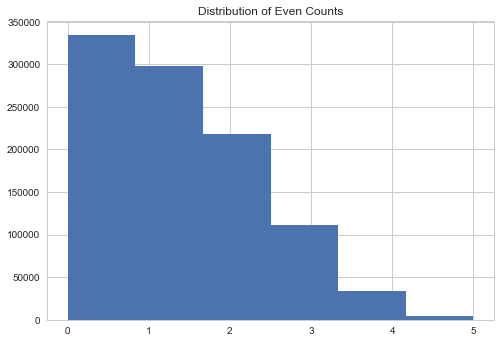

In [6]:
plt.hist(counts_all, bins=6)
plt.title('Distribution of Even Counts')